#1. Create a function $f(x)$ calculating $-x^2+2*x$

In [1]:
def my_fun(x):
    return -x**2 + 2*x

In [2]:
result=my_fun(3)
print(result)

-3


#2. Generate a sequence 0,0.1,0.2,….,1.5 and name it as $x$. Count the length and name it as $n$

In [3]:
import numpy as np

# Generate the sequence
x = np.arange(0, 1.6, 0.1)

# Count the length
n = len(x)

# Print the sequence and its length
print("Sequence x:", x)
print("Length of x (n):", n)

Sequence x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
Length of x (n): 16


#3. Set seed as “448”.

In [4]:
import numpy as np
np.random.seed(448)


#4. Generate $n$ random numbers from normal distribution with mean 0 and standard deviation 0.1 and save it as error.

In [6]:
# Generate random numbers from normal distribution with mean 0 and std dev 0.1
error = np.random.normal(loc=0, scale=0.1, size=n)
print(error)

[ 0.03583922 -0.06989026 -0.11163877 -0.12896458  0.01889975  0.02160839
  0.05457903 -0.04039985  0.08815635  0.10772317  0.19943883  0.0455044
  0.00237226  0.08094114 -0.00949126  0.07568827]


#5.Generate a n by 1 vector y using relation y=f(x)+error.

In [7]:
y=my_fun(x)+error
# Print the generated x, error, and y vectors
print("Generated x:", x)
print("Generated error:", error)
print("Generated y:", y)

Generated x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
Generated error: [ 0.03583922 -0.06989026 -0.11163877 -0.12896458  0.01889975  0.02160839
  0.05457903 -0.04039985  0.08815635  0.10772317  0.19943883  0.0455044
  0.00237226  0.08094114 -0.00949126  0.07568827]
Generated y: [0.03583922 0.12010974 0.24836123 0.38103542 0.65889975 0.77160839
 0.89457903 0.86960015 1.04815635 1.09772317 1.19943883 1.0355044
 0.96237226 0.99094114 0.83050874 0.82568827]


#6. Create a function knn.pred with two augments: K and an observation x0. This function will fit a KNN regression with parameter K based on (x,y) and predict response for the observation x0. Test your function using K=5 and x0=1

In [9]:
def knn_pred(x, y, K, x0):
    # Calculate Euclidean distances between x and x0
    distances = np.abs(x - x0)

    # Find indices of K-nearest neighbors
    k_nearest_indices = np.argsort(distances)[:K]

    # Use the mean of the corresponding y values as the predicted value
    predicted_value = np.mean(y[k_nearest_indices])

    return predicted_value

# Example usage
# Assuming you have x, y, and the function f(x) + error from the previous examples
# Test the function with K=5 and x0=1
K = 5
x0 = 1
prediction = knn_pred(x, y, K, x0)

print(f"Prediction for x0={x0} with K={K}: {prediction}")

Prediction for x0=1 with K=5: 1.0686390038661142


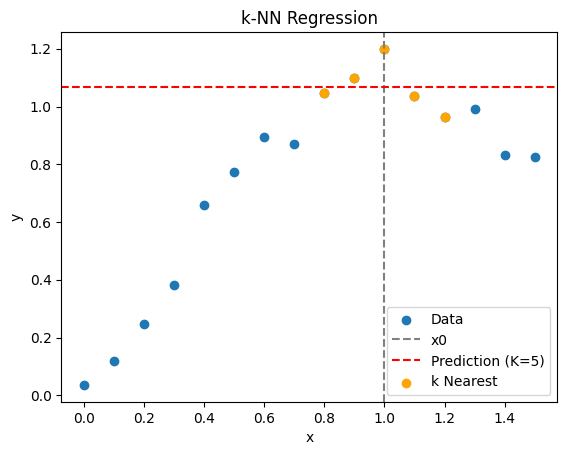

In [12]:
import matplotlib.pyplot as plt

# Plot data
plt.scatter(x, y, label='Data')
plt.axvline(x0, color='gray', linestyle='--', label='x0')
plt.axhline(prediction, color='red', linestyle='--', label=f'Prediction (K={K})')
# Highlight neighbors
distances = np.abs(x - x0)
k_nearest_indices = np.argsort(distances)[:K]
plt.scatter(x[k_nearest_indices], y[k_nearest_indices], color='orange', label='k Nearest')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('k-NN Regression')
plt.show()

#7. Use the function you created in 6) to calculate the training MSE for the data (x,y) we have. (Set K=5)

In [13]:
# Set K for kNN
K = 5

# Calculate predictions for each observation in the training set
y_pred = np.array([knn_pred(x, y, K, xi) for xi in x])

# Calculate Mean Squared Error (MSE)
mse = np.mean((y - y_pred)**2)

print(f"Training MSE for K={K}: {mse}")

Training MSE for K=5: 0.009874513058305025


#8.  Use your code in 7) to create a function with one argument K. The output is the training MSE of data.

In [14]:
def knn_training_mse(K, x, y):
    # Function to calculate prediction using kNN
    def knn_pred(x0):
        distances = np.abs(x - x0)
        k_nearest_indices = np.argsort(distances)[:K]
        return np.mean(y[k_nearest_indices])

    # Calculate predictions for each observation in the training set
    y_pred = np.array([knn_pred(xi) for xi in x])

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y - y_pred)**2)

    return mse

In [15]:
K = 1
mse = knn_training_mse(K, x, y)

print(f"Training MSE for K={K}: {mse}")

Training MSE for K=1: 0.0


#9. Make a plot to see the relation between 1/K and the training MSE.

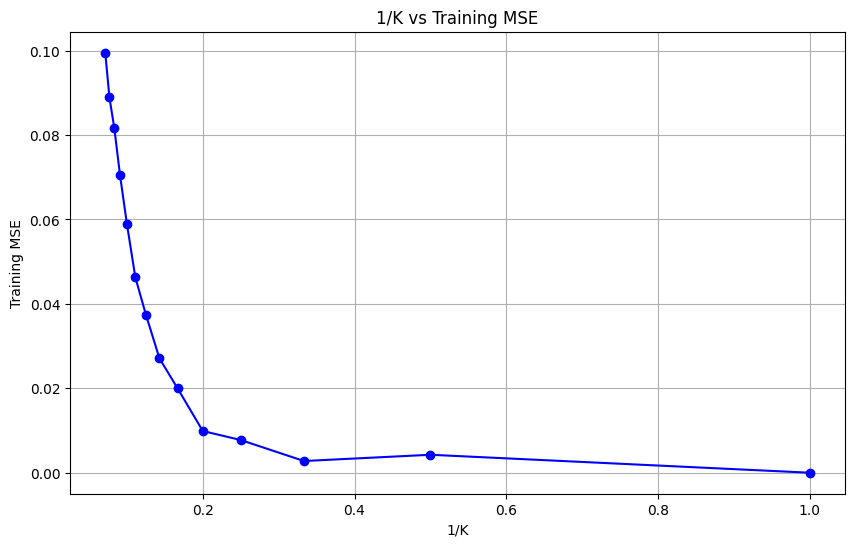

In [16]:
import matplotlib.pyplot as plt
# Range of K values
K_values = np.arange(1, 15)
inverse_K_values = 1 / K_values

# Calculate training MSE for each K
mse_values = [knn_training_mse(K, x, y) for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(inverse_K_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('1/K vs Training MSE')
plt.xlabel('1/K')
plt.ylabel('Training MSE')
plt.grid(True)
plt.show()

#10.

In [17]:
def knn_test_mse(K, x_train, y_train, x_test, y_true_test):
    def knn_pred(x0):
        distances = np.abs(x_train - x0)
        k_nearest_indices = np.argsort(distances)[:K]
        return np.mean(y_train[k_nearest_indices])

    y_pred_test = np.array([knn_pred(xi) for xi in x_test])
    mse_test = np.mean((y_true_test - y_pred_test)**2)

    return mse_test

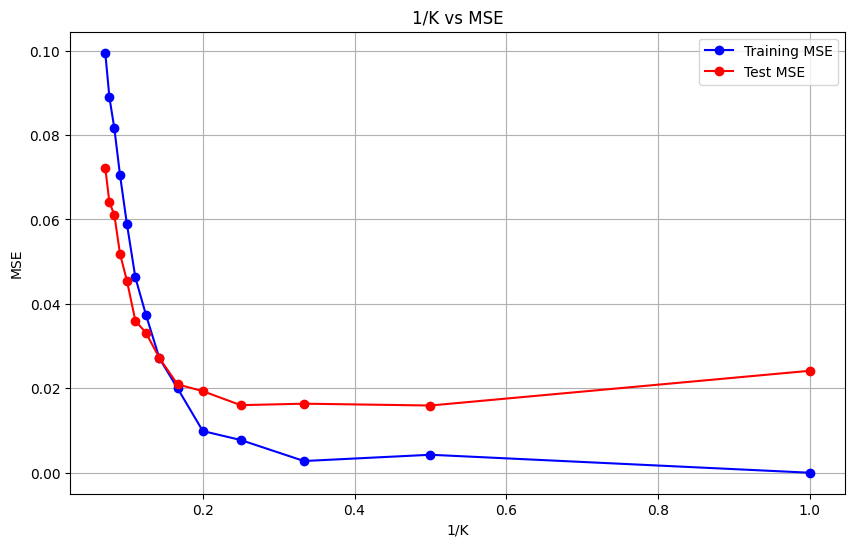

In [18]:
# Generate test data
x_test = np.arange(0.05, 1.5, 0.1)
y_true_test = my_fun(x_test) + np.random.normal(loc=0, scale=0.1, size=len(x_test))

# Range of K values
K_values = np.arange(1, 15)
inverse_K_values = 1 / K_values

# Calculate test MSE for each K
mse_test_values = [knn_test_mse(K, x, y, x_test, y_true_test) for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(inverse_K_values, mse_values, marker='o', linestyle='-', color='b', label='Training MSE')
plt.plot(inverse_K_values, mse_test_values, marker='o', linestyle='-', color='r', label='Test MSE')
plt.title('1/K vs MSE')
plt.xlabel('1/K')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()